# Implementation of Binary Classifier using LogisticRegression from scratch 

* Input neurons : 2
* Activation function : Sigmoid
* Loss function : Log loss
* Output neuron : 1

In [ ]:
import math
import random

Sigmoid activation function using formula $\sigma(z) = \frac{1}{1 + e^{-z}}$

In [2]:
def sigmoid(z:float)->float:
    if z < 0:
        return 1 - (1/(1+math.exp(z)))
    return 1/(1+math.exp(-z))

Creating a random dataset with condition if x1 < 0.2 and x2 > 0.8, y should be 0, otherwise 1

In [3]:
dataset = []
m = 10000
for j in range(m):
    x1 = round(random.random(), 4)
    x2 = round(random.random(), 4)
    y = 0 if x1<0.2 and x2>0.8 else 1

    dataset += [(x1, x2, y)]

Initializing some random weights and bias

In [6]:
w1 = 0.123
w2 = 0.42
b1 = 0.887

Training for an epoch of 10000 with learning rate 0.01

Following are the derivative notations used in the code for reference

$dz = \frac{dJ}{dz}$

$dw1 = \frac{dJ}{dw1}$

$dw2 = \frac{dJ}{dw2}$

$db1 = \frac{dJ}{db1}$


In [7]:
cost_history = []
epochs = 10000
for epoch in range(epochs):
    cost_J = 0
    dw1 = 0
    dw2 = 0
    db1 = 0
    dz = 0
    l_rate = 0.01

    for i in range(m):
        x1, x2, y = dataset[i]
        z = (w1 * x1) + (w2 * x2) + b1
        y_c = sigmoid(z)
        
        # Adding a small value of 1e-10 to the y_c to get rid of log(0) or log(negative value)
        cost_J += -(y * math.log(y_c + 1e-10) + (1 - y) * math.log(1 - y_c + 1e-10))

        # 
        dz = y_c - y
        dw1 += x1 * dz
        dw2 += x2 * dz
        db1 += dz

    cost_J /= m
    dw1 /= m
    dw2 /= m
    db1 /= m

    w1 = w1 - (l_rate * dw1)
    w2 = w2 - (l_rate * dw2)
    b1 = b1 - (l_rate * db1)

    cost_history += [cost_J]
print(f"Cost - {cost_J}")



Cost - 0.13255380968712718


Creating a function to plot the history of cost function as a 2d graph

In [12]:
import matplotlib.pyplot as plt

def plot_2d_graph(array):
    x = [i for i in range(len(array))]
    y = array

    plt.plot(x, y)
    plt.xlabel('Epoch')
    plt.ylabel('Cost(J)')
    plt.title('Gradient of Cost function J')
    plt.show()

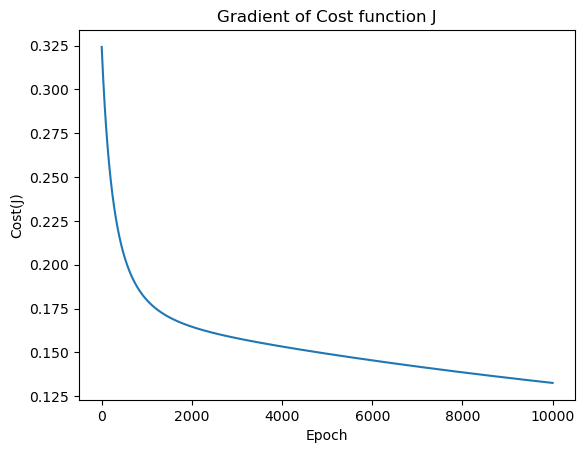

In [13]:
plot_2d_graph(cost_history)